#### Develop a conversational AI chatbot leveraging transformer-based language models (e.g., BERT, GPT-2, RoBERTa) trained specifically on customer support conversations within the banking sector, potentially exploring advanced or hybrid transformer architectures (e.g., GPT-3, LLaMA, and fine-tuned open-source models) for enhanced capabilities. The chatbot will provide instant, accurate, and contextually relevant responses to common banking queries, effectively simulating human-agent interactions.

In [1]:
# Import Modules

import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
conversation_data = pd.read_csv('banking-conversations-sample (1).csv')

In [3]:
conversation_data.head()

,conversation_id,speaker,date_time,text
0,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:33:33+00:00,"Good morning, thank you for calling Union Fina..."
1,2b6544c382e6423b96785c1a135d8e95,client,2023-09-06T14:33:41.307692+00:00,"Hi Monroe, my name is Della. I need help manag..."
2,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:33:50.538461+00:00,"Of course, Della. I'd be happy to help you wit..."
3,2b6544c382e6423b96785c1a135d8e95,client,2023-09-06T14:34:01.153846+00:00,Sure thing. My account number is 1234567890.
4,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:34:04.384615+00:00,"Thank, thank you for providing that informatio..."


In [4]:
# Clean Text

import re
import html
import pandas as pd
from nltk.corpus import stopwords

def clean_text(text):
    if not isinstance(text, str):
        return ""  # Return empty string for non-string values

    # Decode HTML entities
    text = html.unescape(text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)

    # Normalize case
    text = text.lower()

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import nltk
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# Apply cleaning function
conversation_data["cleaned_text"] = conversation_data["text"].apply(clean_text)

In [8]:
conversation_data.head()

,conversation_id,speaker,date_time,text,cleaned_text
0,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:33:33+00:00,"Good morning, thank you for calling Union Fina...",good morning thank calling union financial nam...
1,2b6544c382e6423b96785c1a135d8e95,client,2023-09-06T14:33:41.307692+00:00,"Hi Monroe, my name is Della. I need help manag...",hi monroe name della need help managing bills ...
2,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:33:50.538461+00:00,"Of course, Della. I'd be happy to help you wit...",course della happy help get started may please...
3,2b6544c382e6423b96785c1a135d8e95,client,2023-09-06T14:34:01.153846+00:00,Sure thing. My account number is 1234567890.,sure thing account number 1234567890
4,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:34:04.384615+00:00,"Thank, thank you for providing that informatio...",thank thank providing information let discuss ...


In [9]:
def tokenize_text(text):
    return tokenizer.encode(text, add_special_tokens=True)

In [10]:
import spacy
import os

# Suppress Hugging Face symlink warning
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

# Load spaCy model
nlp = spacy.load("en_core_web_sm")


In [11]:
# Define intents and patterns
intent_patterns = {
    # Existing intents
    "check_balance": ["check balance", "account balance", "balance inquiry", "what's my balance"],
    "set_up_payments": ["automatic payment", "set up payment", "schedule payment", "recurring payment"],
    "verify_identity": ["verify identity", "confirm identity", "identity check", "validate identity", "please verify", "security number"],
    "get_account_number": ["account number", "my account", "what's my account number", "check account id"],
    "transfer_money": ["send money", "transfer funds", "move money", "wire transfer"],
    "close_account": ["close account", "terminate account", "cancel account", "delete account"],

    # New intents based on the word cloud
    "greeting": ["hi", "hello", "good morning", "good evening", "welcome"],
    "farewell": ["bye", "goodbye", "thank you", "thanks", "great day"],
    "check_interest_rate": ["interest rate", "rate information", "loan rate", "savings rate"],
    "update_personal_info": ["update name", "change name", "update details", "modify information"],
    "card_services": ["credit card", "debit card", "lost card", "replace card"],
    "report_issue": ["problem", "issue", "inconvenience", "apologize", "error", "frustration"],
    "confirm_transaction": ["transaction status", "check transaction", "verify payment"],
    "open_account": ["open account", "new account", "start account", "create account"],
    "loan_inquiry": ["loan application", "loan status", "apply loan", "loan inquiry"],
    "check_security": ["social security", "security check", "security question"],
    "service_availability": ["working hours", "service time", "support availability"],
    "account_type": ["checking account", "savings account", "account type"],
    "contact_support": ["contact support", "speak agent", "talk to human"],
}


In [12]:
def identify_intent(text):
    for intent, patterns in intent_patterns.items():
        if any(pattern in text for pattern in patterns):
            return intent
    return "unknown"

def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [13]:
# Create training data from patterns
texts = []
labels = []

for intent, phrases in intent_patterns.items():
    for phrase in phrases:
        texts.append(phrase)
        labels.append(intent)

In [14]:
# Create DataFrame for training
training_data = pd.DataFrame({'cleaned_text': texts, 'intent': labels})

In [15]:
from sklearn.model_selection import train_test_split
# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(training_data['cleaned_text'], training_data['intent'], test_size=0.2, random_state=42)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Convert text to features using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=3000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=3000)

In [18]:
# Evaluate the model
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

       card_services       1.00      1.00      1.00         2
       check_balance       1.00      1.00      1.00         1
      check_security       0.00      0.00      0.00         1
       close_account       0.00      0.00      0.00         0
     contact_support       0.00      0.00      0.00         1
            farewell       0.00      0.00      0.00         2
            greeting       0.14      1.00      0.25         1
        open_account       0.00      0.00      0.00         1
        report_issue       0.00      0.00      0.00         2
service_availability       0.00      0.00      0.00         1
     set_up_payments       1.00      1.00      1.00         1
      transfer_money       1.00      1.00      1.00         1
     verify_identity       0.67      1.00      0.80         2

            accuracy                           0.50        16
           macro avg       0.37      0.46      0.39        16
      

In [19]:
cleaned_tfidf = vectorizer.transform(conversation_data['cleaned_text'])
predicted_intents = model.predict(cleaned_tfidf)

In [20]:
conversation_data['intent'] = predicted_intents

In [21]:
conversation_data.head()

,conversation_id,speaker,date_time,text,cleaned_text,intent
0,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:33:33+00:00,"Good morning, thank you for calling Union Fina...",good morning thank calling union financial nam...,update_personal_info
1,2b6544c382e6423b96785c1a135d8e95,client,2023-09-06T14:33:41.307692+00:00,"Hi Monroe, my name is Della. I need help manag...",hi monroe name della need help managing bills ...,greeting
2,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:33:50.538461+00:00,"Of course, Della. I'd be happy to help you wit...",course della happy help get started may please...,verify_identity
3,2b6544c382e6423b96785c1a135d8e95,client,2023-09-06T14:34:01.153846+00:00,Sure thing. My account number is 1234567890.,sure thing account number 1234567890,get_account_number
4,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:34:04.384615+00:00,"Thank, thank you for providing that informatio...",thank thank providing information let discuss ...,set_up_payments


Intent Distribution Table:
                   Intent  Count
0               greeting  21252
1               farewell   5740
2   update_personal_info   4142
3     get_account_number   3412
4        verify_identity   3395
5           report_issue   2580
6          close_account   2131
7    check_interest_rate   1433
8           loan_inquiry   1365
9         transfer_money   1186
10          account_type    999
11       set_up_payments    713
12         card_services    471
13          open_account    467
14   confirm_transaction    338
15         check_balance    326
16        check_security     34
17  service_availability     16


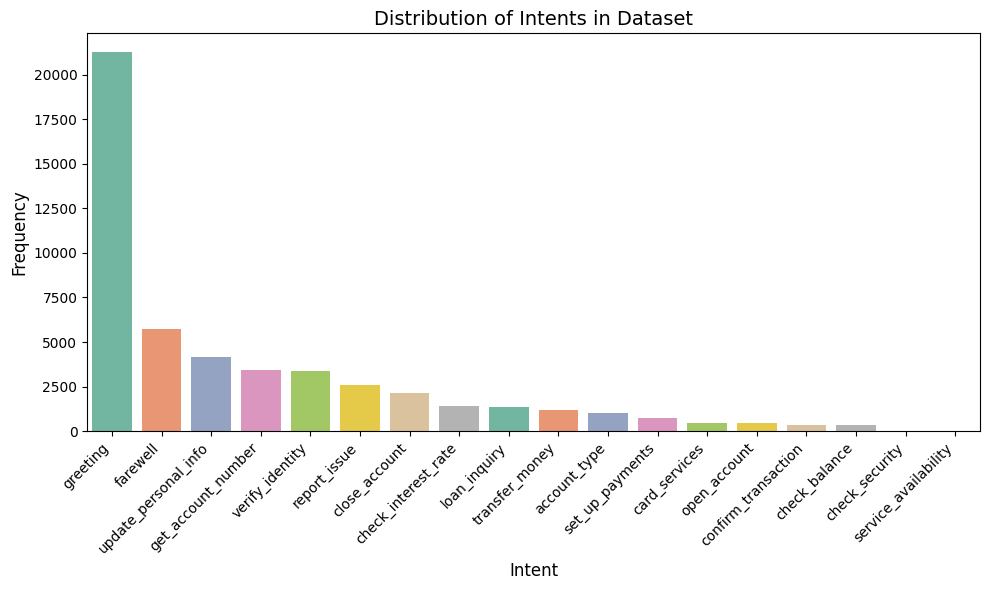

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


intent_counts = conversation_data['intent'].value_counts().reset_index()
intent_counts.columns = ['Intent', 'Count']
print("Intent Distribution Table:\n", intent_counts)

# Plot the intent distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='intent', data=conversation_data, order=conversation_data['intent'].value_counts().index, palette='Set2')

# Beautify the plot
plt.title('Distribution of Intents in Dataset', fontsize=14)
plt.xlabel('Intent', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
# 3. Encode the Intent Labels
label_encoder = LabelEncoder()
conversation_data['intent_encoded'] = label_encoder.fit_transform(conversation_data['intent'])

In [24]:
# 4. Tokenize and Pad the Text Data
max_words = 5000  # Vocabulary size
max_len = 50    # Max length of padded sequences

In [25]:
#pip install tensorflow

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(conversation_data['cleaned_text'])

In [27]:
conversation_data.head()

,conversation_id,speaker,date_time,text,cleaned_text,intent,intent_encoded
0,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:33:33+00:00,"Good morning, thank you for calling Union Fina...",good morning thank calling union financial nam...,update_personal_info,16
1,2b6544c382e6423b96785c1a135d8e95,client,2023-09-06T14:33:41.307692+00:00,"Hi Monroe, my name is Della. I need help manag...",hi monroe name della need help managing bills ...,greeting,9
2,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:33:50.538461+00:00,"Of course, Della. I'd be happy to help you wit...",course della happy help get started may please...,verify_identity,17
3,2b6544c382e6423b96785c1a135d8e95,client,2023-09-06T14:34:01.153846+00:00,Sure thing. My account number is 1234567890.,sure thing account number 1234567890,get_account_number,8
4,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:34:04.384615+00:00,"Thank, thank you for providing that informatio...",thank thank providing information let discuss ...,set_up_payments,14


In [28]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(conversation_data, test_size=0.2, random_state=42)

print(f"Training samples: {len(train_data)}, Testing samples: {len(test_data)}")

Training samples: 40000, Testing samples: 10000


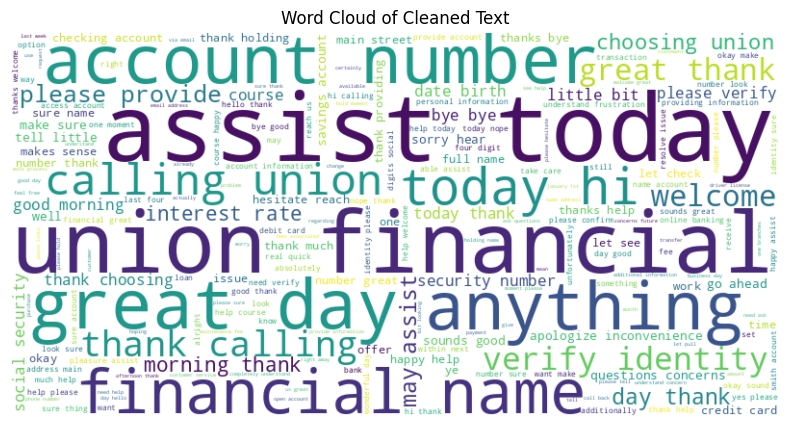

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure text corpus is correctly joined
text_corpus = ' '.join(conversation_data["cleaned_text"].dropna())

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Cleaned Text")
plt.show()


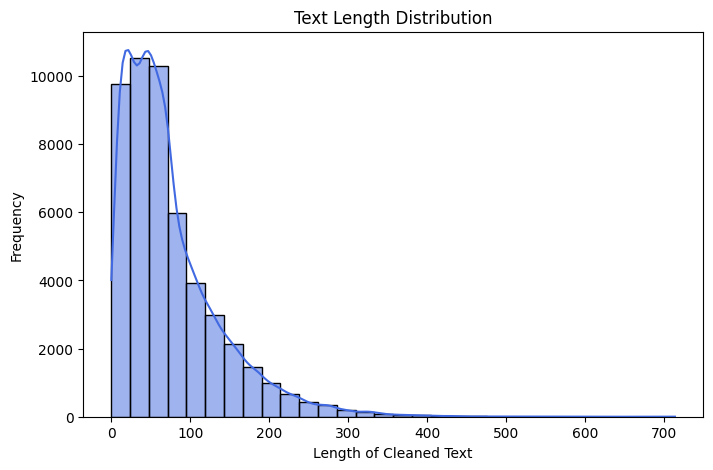

In [30]:
# Visual 4: Text Length Distribution
conversation_data["text_length"] = conversation_data["cleaned_text"].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(conversation_data["text_length"], bins=30, kde=True, color="royalblue")
plt.title("Text Length Distribution")
plt.xlabel("Length of Cleaned Text")
plt.ylabel("Frequency")
plt.show()

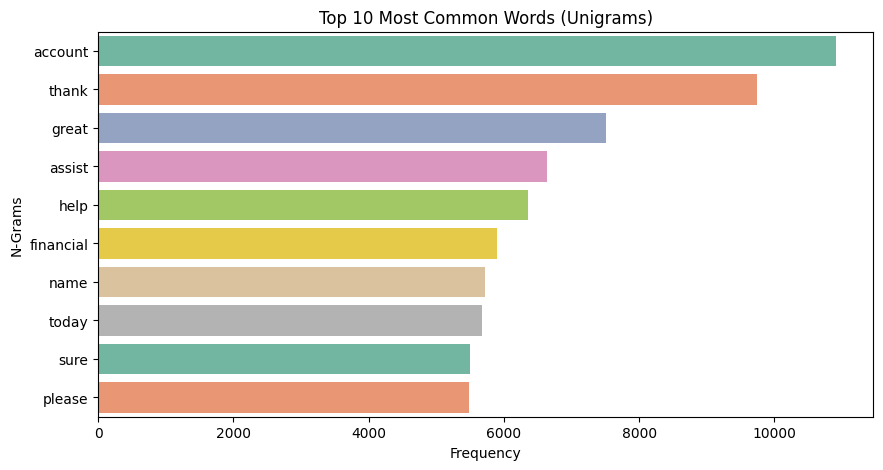

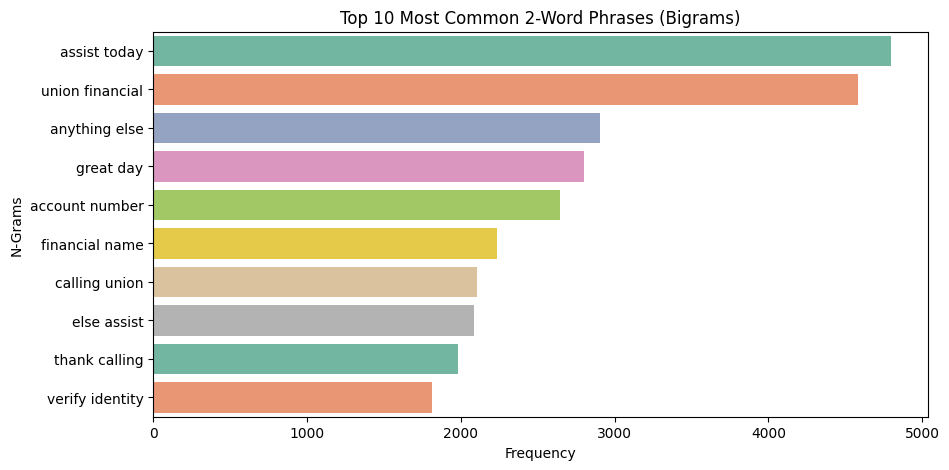

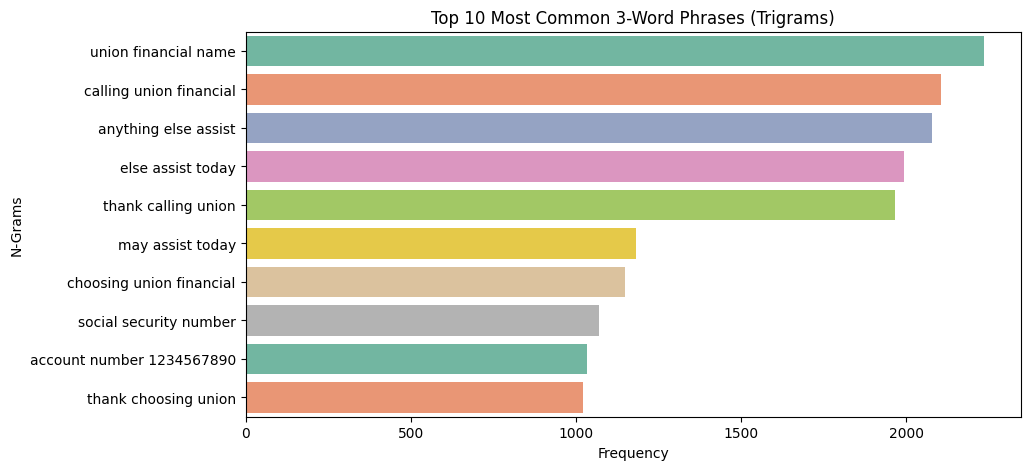

In [31]:
from collections import Counter
from nltk import ngrams
import itertools

# Helper function to generate n-grams from cleaned text
def get_ngrams(text_list, n):
    ngram_list = list(itertools.chain(*[ngrams(text.split(), n) for text in text_list]))
    return [" ".join(ngram) for ngram in ngram_list]

# Extract cleaned text from the DataFrame
cleaned_texts = conversation_data["cleaned_text"].dropna()

# Get most common unigrams, bigrams, trigrams
unigrams = Counter(get_ngrams(cleaned_texts, 1)).most_common(10)   # Most common 1-word combinations
bigrams = Counter(get_ngrams(cleaned_texts, 2)).most_common(10)    # Most common 2-word combinations
trigrams = Counter(get_ngrams(cleaned_texts, 3)).most_common(10)   # Most common 3-word combinations

# Function to plot n-gram frequency (with hue fix for Seaborn v0.14+)
def plot_ngram_distribution(ngram_counts, title):
    ngrams, counts = zip(*ngram_counts)
    ngram_series = pd.Series(ngrams)

    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=list(counts),
        y=ngram_series,
        hue=ngram_series,  # Set hue to the y-axis variable
        palette="Set2",
        legend=False  # Avoid duplicate legends
    )
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-Grams")
    plt.show()

# Plot the distributions
plot_ngram_distribution(unigrams, "Top 10 Most Common Words (Unigrams)")
plot_ngram_distribution(bigrams, "Top 10 Most Common 2-Word Phrases (Bigrams)")
plot_ngram_distribution(trigrams, "Top 10 Most Common 3-Word Phrases (Trigrams)")


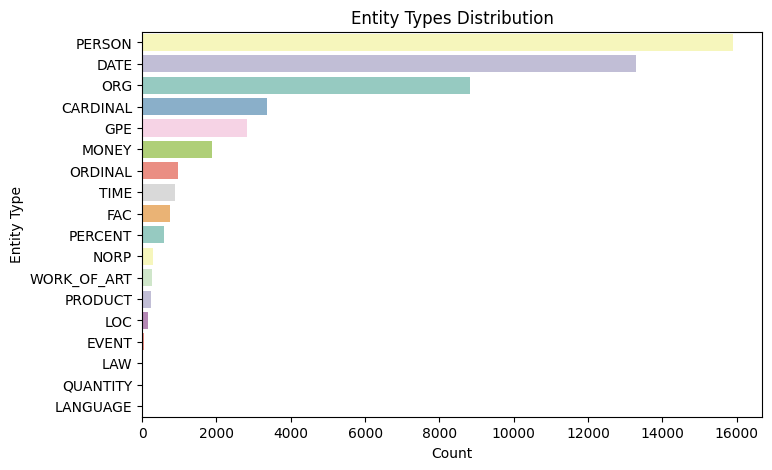

In [32]:
conversation_data["entities"] = conversation_data["text"].apply(lambda x: extract_entities(x) if pd.notna(x) else [])
import matplotlib.pyplot as plt

# Flatten entity labels
entity_types = [label for sublist in conversation_data["entities"] for _, label in sublist]

# Convert to a Pandas Series for easier ordering
entity_series = pd.Series(entity_types)

# Visual 3: Entity Types Distribution
plt.figure(figsize=(8, 5))
sns.countplot(
    y=entity_series,
    hue=entity_series,  # Assigning hue to match the y-axis
    order=entity_series.value_counts().index,
    palette="Set3",
    legend=False  # Remove the duplicate legend
)
plt.title("Entity Types Distribution")
plt.xlabel("Count")
plt.ylabel("Entity Type")
plt.show()

In [33]:
!pip install tf-keras

In [34]:
import time
import psutil
# ... (rest of your existing imports)

def compute_metrics(pred):
    start_time = time.time()  # Start time for latency calculation
    predictions = np.argmax(pred.predictions, axis=1)
    labels = pred.label_ids

    #  Metrics Calculation (Accuracy, F1, Precision, Recall)
    #def compute_metrics(pred):
    #predictions = np.argmax(pred.predictions, axis=1)
    #labels = pred.label_ids
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="weighted")
    precision = precision_score(labels, predictions, average="weighted", zero_division=0)
    recall = recall_score(labels, predictions, average="weighted", zero_division=0)
    #return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

    end_time = time.time()  # End time for latency calculation
    latency = end_time - start_time

    # Computational Resource Usage
    process = psutil.Process()
    cpu_percent = process.cpu_percent()
    memory_info = process.memory_info()
    memory_used_mb = memory_info.rss / (1024 * 1024)  # Memory in MB

    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "latency": latency,
        "cpu_percent": cpu_percent,
        "memory_used_mb": memory_used_mb,
    }

### Bert Tokenizer

In [39]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(conversation_data['intent_encoded'].unique()))


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
import torch
from torch.utils.data import Dataset, DataLoader
class IntentDataset(torch.utils.data.Dataset):
    def __init__(self, texts, speakers, labels, tokenizer):
        # Include speaker in the text
        self.encodings = tokenizer(
            [f"[{s}] {t}" for s, t in zip(speakers, texts)],
            padding="max_length",
            truncation=True,
            max_length=256
        )
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {**{k: torch.tensor(v[idx]) for k, v in self.encodings.items()}, "labels": torch.tensor(self.labels[idx])}


In [41]:
# Prepare datasets
train_dataset = IntentDataset(train_data['cleaned_text'].tolist(), train_data['speaker'].tolist(), train_data['intent_encoded'].tolist(), tokenizer)
test_dataset = IntentDataset(test_data['cleaned_text'].tolist(), train_data['speaker'].tolist(), test_data['intent_encoded'].tolist(), tokenizer)

In [42]:
# Training arguments
training_args = TrainingArguments(
    output_dir='./banking_intent_model',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir='./logs',
    logging_steps=10,
    num_train_epochs=1,
    report_to="none"
)


In [49]:
# Initialize Trainer
bert_trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)


In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import pandas as pd
# Fine-tune BERT
bert_trainer.train()



Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Latency,Cpu Percent,Memory Used Mb
1,0.098400,0.063544,0.983700,0.983489,0.983425,0.983700,0.011436,0.000000,2515.113281


TrainOutput(global_step=2500, training_loss=0.09099084415435792, metrics={'train_runtime': 925.1919, 'train_samples_per_second': 43.234, 'train_steps_per_second': 2.702, 'total_flos': 2650103930880000.0, 'train_loss': 0.09099084415435792, 'epoch': 1.0})

In [51]:
  # Save model and tokenizer
model.save_pretrained("/content/drive/MyDrive/chatbot/bert_intent_model")
tokenizer.save_pretrained("/content/drive/MyDrive/chatbot/bert_intent_model")

('/content/drive/MyDrive/chatbot/bert_intent_model/tokenizer_config.json',
 '/content/drive/MyDrive/chatbot/bert_intent_model/special_tokens_map.json',
 '/content/drive/MyDrive/chatbot/bert_intent_model/vocab.txt',
 '/content/drive/MyDrive/chatbot/bert_intent_model/added_tokens.json')

In [52]:
from sklearn.metrics import accuracy_score, classification_report

results = bert_trainer.evaluate(test_dataset)
print("Evaluation Metrics:", results)

Evaluation Metrics: {'eval_loss': 0.0635443851351738, 'eval_accuracy': 0.9837, 'eval_f1': 0.9834885027307859, 'eval_precision': 0.9834254356429414, 'eval_recall': 0.9837, 'eval_latency': 0.010713338851928711, 'eval_cpu_percent': 0.0, 'eval_memory_used_mb': 2521.88671875, 'eval_runtime': 71.7853, 'eval_samples_per_second': 139.304, 'eval_steps_per_second': 8.707, 'epoch': 1.0}


### Fine-Tune DistilBERT

In [35]:
# Encode Intent Labels
label2id = {label: i for i, label in enumerate(conversation_data['intent'].unique())}
id2label = {i: label for label, i in label2id.items()}
conversation_data['intent_encoded_Distil_bert'] = conversation_data['intent'].map(label2id)

In [36]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [43]:
# Prepare datasets
train_dataset = IntentDataset(train_data['cleaned_text'].tolist(), train_data['speaker'].tolist(), train_data['intent_encoded'].tolist(), tokenizer)
test_dataset = IntentDataset(test_data['cleaned_text'].tolist(), train_data['speaker'].tolist(), test_data['intent_encoded'].tolist(), tokenizer)

In [44]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import pandas as pd
# ✅ Load Pretrained DistilBERT Model
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

# ✅ Set Training Arguments
training_args = TrainingArguments(
    output_dir="./distilbert-intent-model",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=50,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    report_to="tensorboard",
)

distilbert_trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
# ✅ Train the Model (with Metrics Tracking)
distilbert_trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Latency,Cpu Percent,Memory Used Mb
1,0.117400,0.070151,0.979300,0.979069,0.979103,0.979300,0.010903,0.000000,2512.363281


TrainOutput(global_step=2500, training_loss=0.270384481048584, metrics={'train_runtime': 927.0953, 'train_samples_per_second': 43.146, 'train_steps_per_second': 2.697, 'total_flos': 2650103930880000.0, 'train_loss': 0.270384481048584, 'epoch': 1.0})

In [46]:
  # Save model and tokenizer
model.save_pretrained("/content/drive/MyDrive/chatbot/distilbert_intent_model")
tokenizer.save_pretrained("/content/drive/MyDrive/chatbot/distilbert_intent_model")

('/content/drive/MyDrive/chatbot/distilbert_intent_model/tokenizer_config.json',
 '/content/drive/MyDrive/chatbot/distilbert_intent_model/special_tokens_map.json',
 '/content/drive/MyDrive/chatbot/distilbert_intent_model/vocab.txt',
 '/content/drive/MyDrive/chatbot/distilbert_intent_model/added_tokens.json')

In [47]:
distil_results = distilbert_trainer.evaluate(test_dataset)
print("Evaluation Metrics:", distil_results)

Evaluation Metrics: {'eval_loss': 0.07015088945627213, 'eval_accuracy': 0.9793, 'eval_f1': 0.979069021602149, 'eval_precision': 0.9791028665780827, 'eval_recall': 0.9793, 'eval_latency': 0.021102190017700195, 'eval_cpu_percent': 0.0, 'eval_memory_used_mb': 2515.11328125, 'eval_runtime': 71.6437, 'eval_samples_per_second': 139.58, 'eval_steps_per_second': 8.724, 'epoch': 1.0}


### Chat-gpt-2

In [53]:
from transformers import GPT2ForSequenceClassification, GPT2Tokenizer, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import torch
import numpy as np

#  Load GPT-2 model and tokenizer for classification
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=len(intent_patterns))

#  Set padding token (GPT-2 doesn't have one by default)
tokenizer.pad_token = tokenizer.eos_token  # Use EOS token as padding
model.config.pad_token_id = tokenizer.pad_token_id

# Prepare datasets
train_dataset = IntentDataset(train_data['cleaned_text'].tolist(), train_data['speaker'].tolist(), train_data['intent_encoded'].tolist(), tokenizer)
test_dataset = IntentDataset(test_data['cleaned_text'].tolist(), train_data['speaker'].tolist(), test_data['intent_encoded'].tolist(), tokenizer)

#  Prepare datasets
# train_dataset = IntentDataset(train_data['cleaned_text'].tolist(), train_data['intent_encoded'].tolist())
# test_dataset = IntentDataset(test_data['cleaned_text'].tolist(), test_data['intent_encoded'].tolist())

#  Set training arguments
training_args = TrainingArguments(
    output_dir="./gpt2_intent_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,  # Ensure batch size > 1 works
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=200,
)

#  Initialize Trainer
chatgpt_trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [54]:
chatgpt_trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sanjalps03 (sanjalps03-excelr-solutions) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Latency,Cpu Percent,Memory Used Mb
1,0.180300,0.114259,0.973300,0.972986,0.973100,0.973300,0.011611,0.000000,3139.769531


TrainOutput(global_step=5000, training_loss=0.3097233287811279, metrics={'train_runtime': 2318.1033, 'train_samples_per_second': 17.255, 'train_steps_per_second': 2.157, 'total_flos': 5226737172480000.0, 'train_loss': 0.3097233287811279, 'epoch': 1.0})

In [55]:
# ✅ Save the model and tokenizer
model.save_pretrained("/content/drive/MyDrive/chatbot/gpt2_intent_classifier")
tokenizer.save_pretrained("/content/drive/MyDrive/chatbot/gpt2_intent_classifier")

('/content/drive/MyDrive/chatbot/gpt2_intent_classifier/tokenizer_config.json',
 '/content/drive/MyDrive/chatbot/gpt2_intent_classifier/special_tokens_map.json',
 '/content/drive/MyDrive/chatbot/gpt2_intent_classifier/vocab.json',
 '/content/drive/MyDrive/chatbot/gpt2_intent_classifier/merges.txt',
 '/content/drive/MyDrive/chatbot/gpt2_intent_classifier/added_tokens.json')

In [56]:
# ✅ Evaluate the model
chatgpt_results = chatgpt_trainer.evaluate(test_dataset)
print("Test Results: ", chatgpt_results)

Test Results:  {'eval_loss': 0.11425863951444626, 'eval_accuracy': 0.9733, 'eval_f1': 0.9729855013411336, 'eval_precision': 0.9730995484404109, 'eval_recall': 0.9733, 'eval_latency': 0.010445833206176758, 'eval_cpu_percent': 0.0, 'eval_memory_used_mb': 3109.26953125, 'eval_runtime': 163.6402, 'eval_samples_per_second': 61.11, 'eval_steps_per_second': 7.639, 'epoch': 1.0}


RoBerta Model

In [57]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import torch

# ✅ Load RoBERTa model and tokenizer for classification
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=len(intent_patterns))

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [58]:
# ✅ Custom Dataset Class (with Tokenizer)
class IntentDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.encodings = tokenizer(texts, padding="max_length", truncation=True, max_length=256)
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {**{k: torch.tensor(v[idx]) for k, v in self.encodings.items()}, "labels": torch.tensor(self.labels[idx])}


In [60]:
# ✅ Set training arguments
training_args = TrainingArguments(
    output_dir="./llama_intent_results",     # Directory to save checkpoints
    evaluation_strategy="epoch",             # Evaluate after each epoch
    save_strategy="epoch",                   # Save model checkpoints every epoch
    learning_rate=2e-5,                      # Lower learning rate for large models
    per_device_train_batch_size=4,           # Reduce batch size for LLaMA (GPU intensive)
    per_device_eval_batch_size=4,
    num_train_epochs=1,                      # Number of epochs
    weight_decay=0.01,                       # Regularization
    logging_dir="./logs",                    # Log directory
    logging_steps=100,                       # Log every 100 steps
    load_best_model_at_end=True,             # Save the best model
    fp16=True,                               # Mixed precision (faster on modern GPUs)
    push_to_hub=False,                       # Disable auto-push to Hugging Face Hub
)

# ✅ Initialize Trainer
RoBerta_trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import pandas as pd
# ✅ Train the model
RoBerta_trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Latency,Cpu Percent,Memory Used Mb
1,0.338000,0.245989,0.955900,0.955277,0.955431,0.955900,0.010828,0.000000,3020.261719


TrainOutput(global_step=10000, training_loss=0.5286210192680358, metrics={'train_runtime': 1109.6578, 'train_samples_per_second': 36.047, 'train_steps_per_second': 9.012, 'total_flos': 5263024312320000.0, 'train_loss': 0.5286210192680358, 'epoch': 1.0})

In [62]:
# ✅ Save the model and tokenizer
model.save_pretrained("/content/drive/MyDrive/chatbot/roberta_classifier")
tokenizer.save_pretrained("/content/drive/MyDrive/chatbot/roberta_classifier")

('/content/drive/MyDrive/chatbot/roberta_classifier/tokenizer_config.json',
 '/content/drive/MyDrive/chatbot/roberta_classifier/special_tokens_map.json',
 '/content/drive/MyDrive/chatbot/roberta_classifier/vocab.json',
 '/content/drive/MyDrive/chatbot/roberta_classifier/merges.txt',
 '/content/drive/MyDrive/chatbot/roberta_classifier/added_tokens.json')

In [63]:
# ✅ Evaluate the model
Roberta_results = RoBerta_trainer.evaluate()
print("Test Results: ", Roberta_results)

Test Results:  {'eval_loss': 0.24598920345306396, 'eval_accuracy': 0.9559, 'eval_f1': 0.9552765553339574, 'eval_precision': 0.9554306621669115, 'eval_recall': 0.9559, 'eval_latency': 0.013138055801391602, 'eval_cpu_percent': 0.0, 'eval_memory_used_mb': 3352.17578125, 'eval_runtime': 44.1185, 'eval_samples_per_second': 226.663, 'eval_steps_per_second': 56.666, 'epoch': 1.0}


In [67]:
import pandas as pd

# Create a list of dictionaries, where each dictionary represents a model's results
data = [results, distil_results, chatgpt_results, Roberta_results]

# Create the DataFrame
df = pd.DataFrame(data, index=['BERT', 'DistilBERT', 'ChatGPT-2', 'RoBERTa'])

# Display the DataFrame
display(df)

,eval_loss,eval_accuracy,eval_f1,eval_precision,eval_recall,eval_latency,eval_cpu_percent,eval_memory_used_mb,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch
BERT,0.063544,0.9837,0.983489,0.983425,0.9837,0.010713,0.0,2521.886719,71.7853,139.304,8.707,1.0
DistilBERT,0.070151,0.9793,0.979069,0.979103,0.9793,0.021102,0.0,2515.113281,71.6437,139.580,8.724,1.0
ChatGPT-2,0.114259,0.9733,0.972986,0.973100,0.9733,0.010446,0.0,3109.269531,163.6402,61.110,7.639,1.0
RoBERTa,0.245989,0.9559,0.955277,0.955431,0.9559,0.013138,0.0,3352.175781,44.1185,226.663,56.666,1.0


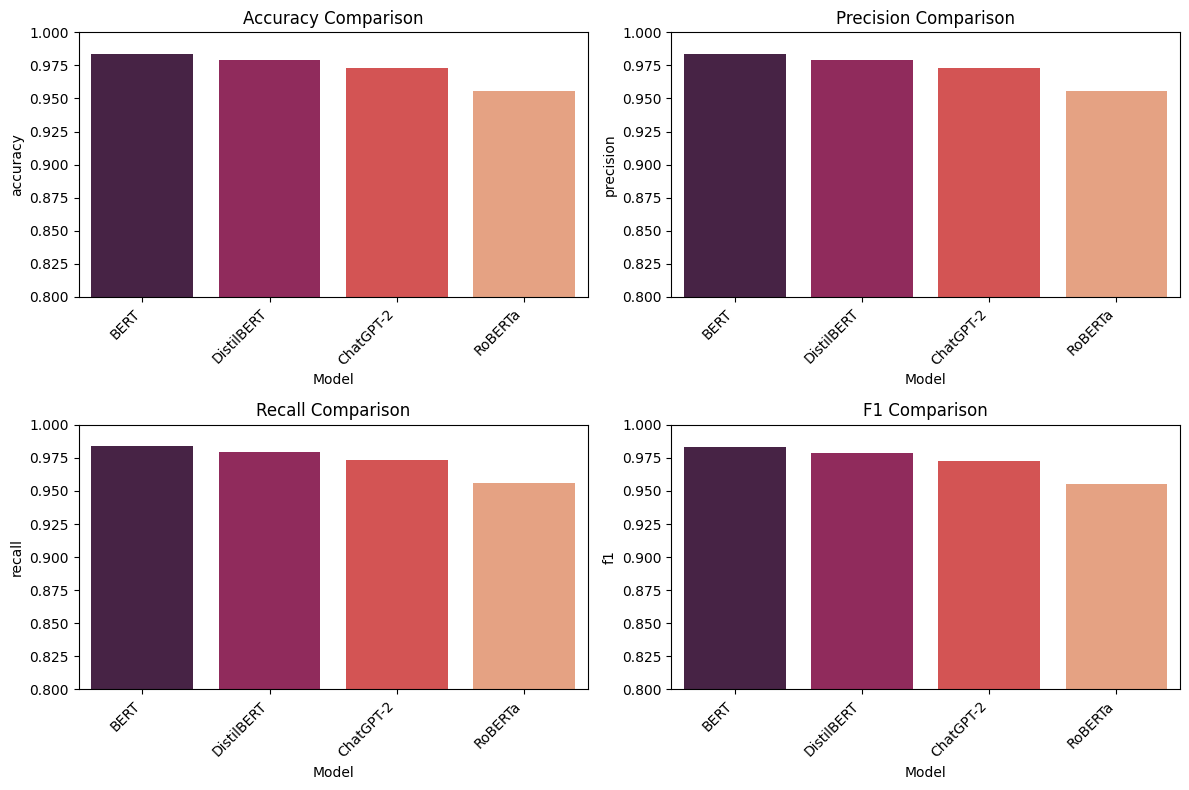

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of metrics to plot
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Assuming df is your existing DataFrame containing model results:
# Reset the index to make 'Model' a column
plot_df = df.reset_index().rename(columns={'index': 'Model'})

# Keep only desired columns for plotting
plot_df = plot_df[['Model', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1']]
plot_df = plot_df.rename(columns={'eval_accuracy': 'accuracy', 'eval_precision': 'precision', 'eval_recall': 'recall', 'eval_f1': 'f1'})

# Create a figure and axes for the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each metric and create a subplot
for i, metric in enumerate(metrics):
    ax = axes[i]  # Get the current subplot axis
    sns.barplot(x='Model', y=metric, data=plot_df, ax=ax, palette='rocket')
    ax.set_title(f'{metric.capitalize()} Comparison')  # Set title for subplot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
    ax.set_ylim([0.8, 1.0])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

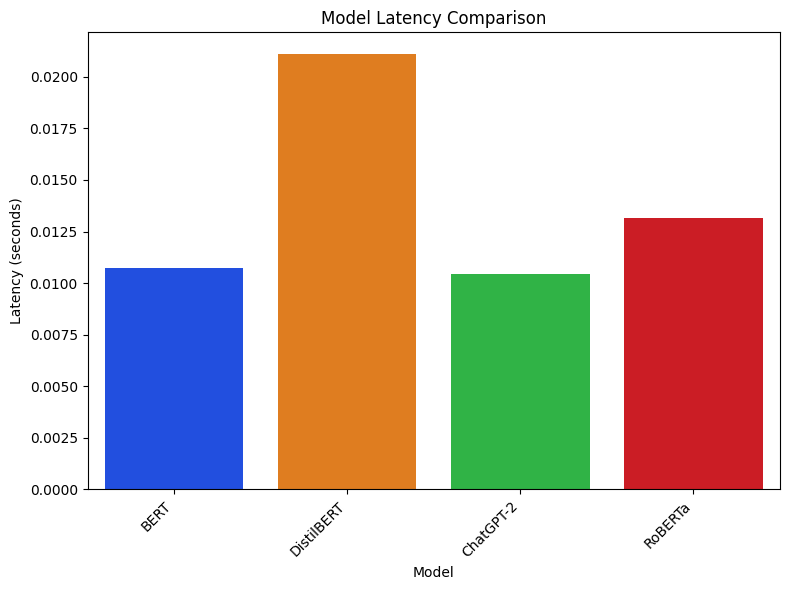

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing latency data
models = df.index  # Get model names from the index
latencies = df['eval_latency']  # Access latency values from the 'latency' column

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=latencies, palette='bright')
plt.title('Model Latency Comparison')
plt.xlabel('Model')
plt.ylabel('Latency (seconds)')  # Or other appropriate unit
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

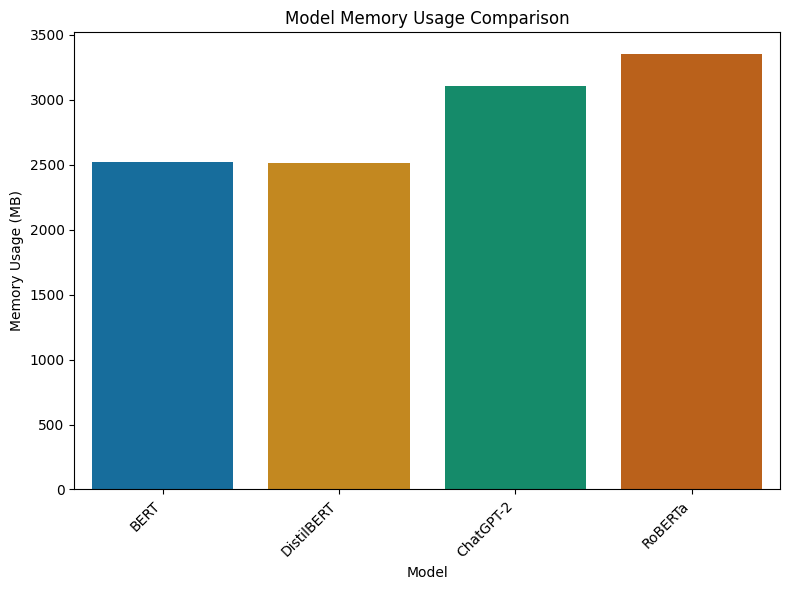

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing memory usage data
models = df.index  # Get model names from the index
memory_usage = df['eval_memory_used_mb']  # Access memory usage values

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=memory_usage, palette='colorblind')
plt.title('Model Memory Usage Comparison')
plt.xlabel('Model')
plt.ylabel('Memory Usage (MB)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()